<img src ="https://www.icesi.edu.co/launiversidad/images/La_universidad/logosimbolos/logo_Icesi_PNG.png"/>


<center>
<h1>Final workshop</h1>


**Javier Díaz Cely**

**Universidad ICESI**

**Fundamentos de analítica II**

**Maestría en Ciencia de Datos**

**Santiago de Cali, Valle del Cauca, Colombia**

**2021-01**

</center>

# Statement

In [ ]:
!wget -O data.csv -nc https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data
!wget -O eighthr.names -nc https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names
!wget -O dictionary.txt -nc https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.names

In [ ]:
%%capture
!pip install wandb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import wandb
from wandb.keras import WandbCallback
import os 
import random
import sklearn

print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))
os.environ["WANDB_NOTEBOOK_NAME"] = "analytics-II-final-workshop"

2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Set the random seeds
os.environ['TF_CUDNN_DETERMINISTIC'] = '1' 
random.seed(hash("setting random seeds") % 2**32 - 1)
np.random.seed(hash("improves reproducibility") % 2**32 - 1)
tf.random.set_seed(hash("by removing stochasticity") % 2**32 - 1)

Data Set Information:

For a list of attributes, please refer to those two .names files. They use the following naming convention:

All the attribute start with T means the temperature measured at different time throughout the day; and those starts with WS indicate the wind speed at various time.

WSR_PK: continuous. peek wind speed -- resultant (meaning average of wind vector)

WSR_AV: continuous. average wind speed

T_PK: continuous. Peak T

T_AV: continuous. Average T

T85: continuous. T at 850 hpa level (or about 1500 m height)

RH85: continuous. Relative Humidity at 850 hpa

U85: continuous. (U wind - east-west direction wind at 850 hpa)

V85: continuous. V wind - N-S direction wind at 850

HT85: continuous. Geopotential height at 850 hpa, it is about the same as height at low altitude

T70: continuous. T at 700 hpa level (roughly 3100 m height)

RH70: continuous.

U70: continuous.

V70: continuous.

HT70: continuous.

T50: continuous. T at 500 hpa level (roughly at 5500 m height)

RH50: continuous.

U50: continuous.

V50: continuous.

HT50: continuous.

KI: continuous. K-Index [Web Link]

TT: continuous. T-Totals [Web Link]

SLP: continuous. Sea level pressure

SLP_: continuous. SLP change from previous day

Precp: continuous. -- precipitation



The following are specifications for several most important attributes that are highly valued by Texas Commission on Environmental Quality (TCEQ). More details can be found in the two relevant papers.

O 3 - Local ozone peak prediction

Upwind - Upwind ozone background level

EmFactor - Precursor emissions related factor

Tmax - Maximum temperature in degrees F

Tb - Base temperature where net ozone production begins (50 F)

SRd - Solar radiation total for the day

WSa - Wind speed near sunrise (using 09-12 UTC forecast mode)

WSp - Wind speed mid-day (using 15-21 UTC forecast mode)

In [3]:
colnames = [s.split(":")[0] for s in open("eighthr.names").readlines()[2:]] + ["ozone_day"]
colnames

['Date',
 'WSR0',
 'WSR1',
 'WSR2',
 'WSR3',
 'WSR4',
 'WSR5',
 'WSR6',
 'WSR7',
 'WSR8',
 'WSR9',
 'WSR10',
 'WSR11',
 'WSR12',
 'WSR13',
 'WSR14',
 'WSR15',
 'WSR16',
 'WSR17',
 'WSR18',
 'WSR19',
 'WSR20',
 'WSR21',
 'WSR22',
 'WSR23',
 'WSR_PK',
 'WSR_AV',
 'T0',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T_PK',
 'T_AV',
 'T85',
 'RH85',
 'U85',
 'V85',
 'HT85',
 'T70',
 'RH70',
 'U70',
 'V70',
 'HT70',
 'T50',
 'RH50',
 'U50',
 'V50',
 'HT50',
 'KI',
 'TT',
 'SLP',
 'SLP_',
 'Precp',
 'ozone_day']

In [4]:
df = pd.read_csv("data.csv", names = colnames)
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,ozone_day
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [5]:
# Identify missing data
df = df.apply(lambda series: series.replace("?", np.nan))
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,ozone_day
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0


In [6]:
# Convert features to float dtype
df.iloc[:,1:-1] = df.iloc[:,1:-1].astype(np.float32)
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,ozone_day
0,1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795.0,-12.10,17.900000,10330.0,-55.0,0.00,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805.0,14.05,29.000000,10275.0,-55.0,0.00,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.60,6.94,9.80,5790.0,17.90,41.299999,10235.0,-40.0,0.00,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775.0,31.15,51.700001,10195.0,-40.0,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0


In [7]:
# Convert date to date dtype
df["Date"] = df["Date"].astype(np.datetime64)
# Convert ozone_day to integer
df["ozone_day"] = df["ozone_day"].astype(int)

df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,ozone_day
0,1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795.0,-12.10,17.900000,10330.0,-55.0,0.00,0
1,1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805.0,14.05,29.000000,10275.0,-55.0,0.00,0
2,1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.60,6.94,9.80,5790.0,17.90,41.299999,10235.0,-40.0,0.00,0
3,1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775.0,31.15,51.700001,10195.0,-40.0,2.08,0
4,1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


In [8]:
df.set_index("Date", inplace=True)
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,ozone_day
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.900000,10330.0,-55.0,0.00,0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.000000,10275.0,-55.0,0.00,0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.299999,10235.0,-40.0,0.00,0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.700001,10195.0,-40.0,2.08,0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


[]

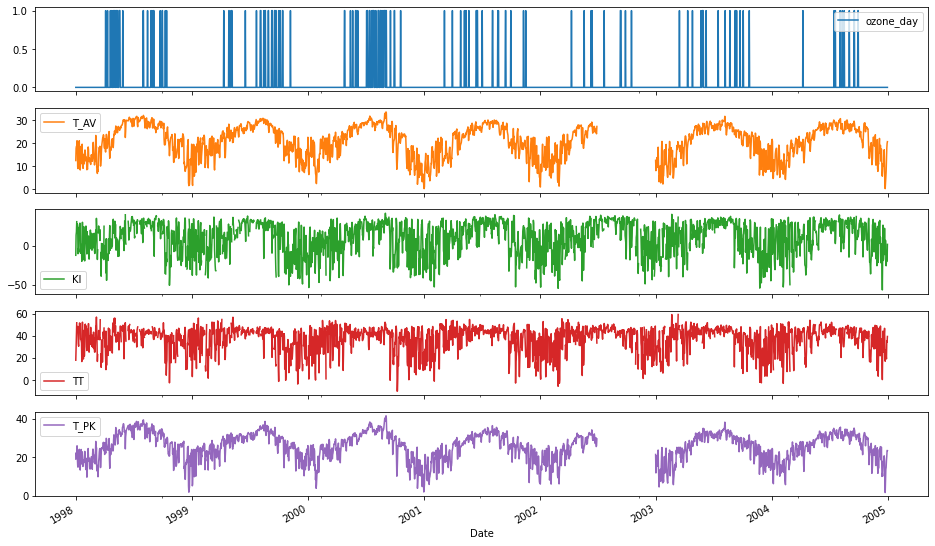

In [9]:
def impute_data(indf, feature, nyears=4):
  indf = df.copy()

  dates_indexes_missing = indf[indf[feature].isna()][feature].index # los índices de los registros on missing values
  year = pd.Timedelta(365, unit='D')
  l = np.arange(1,nyears) # vamos a analizar los valores de la misma fecha en los años adyacentes
  nyrs = np.concatenate((l, -1*l), axis=0) # si years = 4 --> [-3, -2, -1, 1, 2, 3]

  for date in dates_indexes_missing:
    dates = [date + num_year * year for num_year in nyrs] # lista de fechas alrededor del missing
    value2replace = indf.reindex(index=dates)[feature].dropna().mean() # cálculo del promedio del mismo dia en los años alrededor
    indf.loc[date, feature] = value2replace

  return indf[feature] 

cols = [
        "ozone_day", # Target class
        "T_AV", # Target regression
        # "WSR_PK", 
        # "WSR_AV", 
        # "Precp",
        # "RH85",
        "KI",
        "TT",
        "T_PK",
]

df[cols].plot(figsize=(16,len(cols)*2), subplots=True)
plt.plot()

In [10]:
df[df[cols].isna().any(1)][cols]

,ozone_day,T_AV,KI,TT,T_PK
Date,,,,,
1998-01-05,0,21.100000,NaN,NaN,26.000000
1998-03-12,0,7.800000,NaN,NaN,9.900000
1998-03-20,0,10.100000,NaN,NaN,14.700000
1998-03-24,0,19.299999,NaN,NaN,24.900000
1998-04-01,0,17.900000,NaN,NaN,26.700001
...,...,...,...,...,...
2004-07-27,0,26.299999,NaN,NaN,31.100000
2004-07-28,0,26.900000,NaN,NaN,29.799999
2004-07-29,0,28.299999,NaN,NaN,32.000000


[]

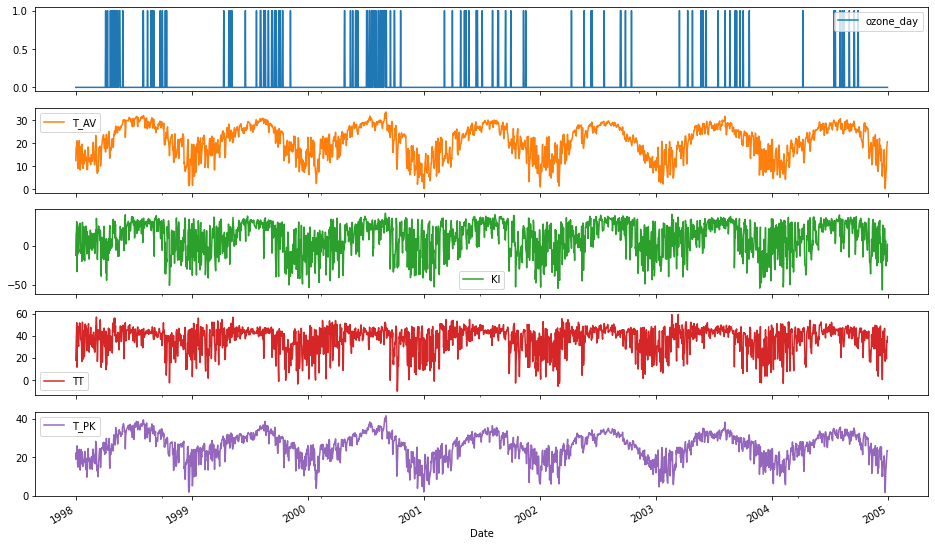

In [11]:
for col in cols[1:]:
  df[col] = impute_data(df, col)

df[cols].plot(figsize=(16,len(cols)*2), subplots=True)
plt.plot()

In [12]:
df[df[cols].isna().any(1)][cols]

,ozone_day,T_AV,KI,TT,T_PK
Date,,,,,


[]

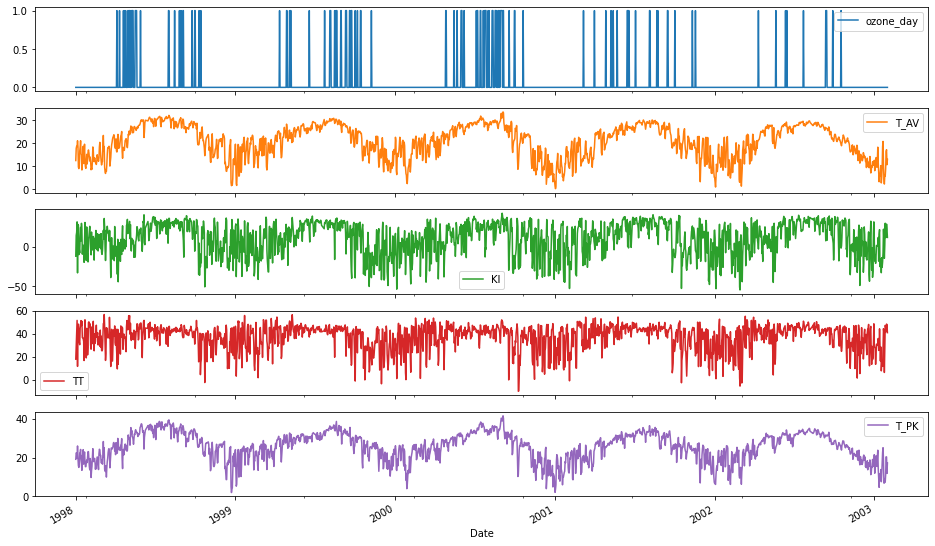

In [13]:
# df[(df.index >= "2002-07-01") & (df.index < "2003-02-01")]
train_df = df[(df.index < "2003-02-01")][cols]
# "2002-07-01"
val_df = df[df.index >= "2003-02-01"][cols]
train_df.plot(figsize=(16,len(cols)*2), subplots=True)
plt.plot()

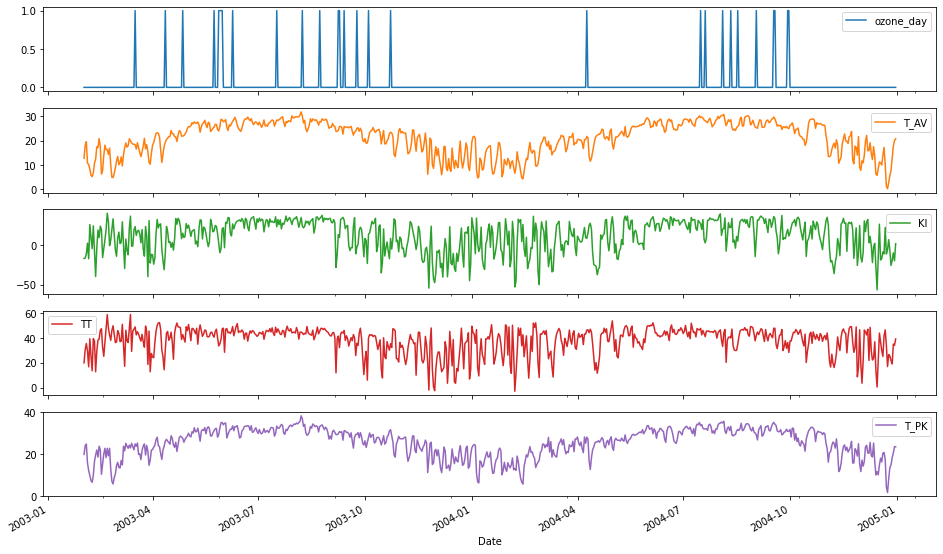

In [14]:
val_df.plot(figsize=(16,len(cols)*2), subplots=True)
plt.show()

# Data Preprocessing

Normalize the data

['T_AV', 'KI', 'TT', 'T_PK', 'T_AV']


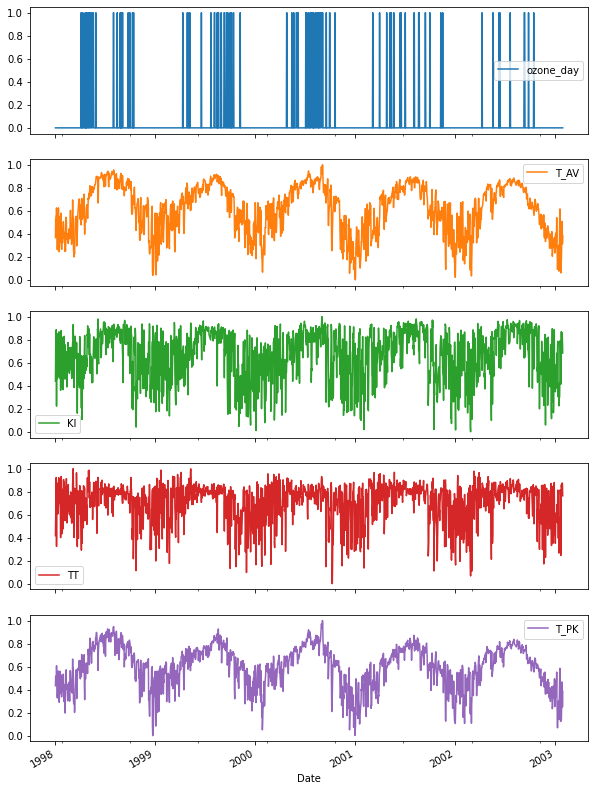

In [15]:
features = cols[1:]
cols_2_normalize = features + ["T_AV"]
print(cols_2_normalize)

minv, maxv = train_df[cols_2_normalize].min(), train_df[cols_2_normalize].max() 
train_df[cols_2_normalize] = (train_df[cols_2_normalize] - minv)  / (maxv - minv)

minv, maxv = val_df[cols_2_normalize].min(), val_df[cols_2_normalize].max() 
val_df[cols_2_normalize] = (val_df[cols_2_normalize] - minv)  / (maxv - minv)

train_df.plot(subplots=True, figsize=(10,15))
plt.show()

Data Generator

In [54]:
WINDOW_SIZE = 30
BATCH_SIZE = 128

def data_generator(df, features, reg_label, class_label, win_size):
  counter = 0
  reg_labels = df[reg_label].values
  class_labels = df[class_label].values
  n_samples = df.shape[0]
  i = 0

  while True:
    # se retornan un registro en forma de una lista de listas [X,y]. 
    # X con los valores de los features
    # y con el valor de las dos variables dependientes, el monto de la regresión y la categoría de la clasificación
    X_train = []
    y_train = {
          "reg": [],
          "class": []
    }
    index = i % n_samples 
    end = index + win_size
    if end >= n_samples: # se para cuando se acaban los registros
      break
    X_train.append(df[features].iloc[index:end,:].values.tolist())
    y_train["reg"].append(reg_labels[end])
    y_train["class"].append(class_labels[end])
    i += 1

    y_train["reg"] = np.squeeze(np.array(y_train["reg"])) 
    y_train["class"] = np.squeeze(np.array(y_train["class"]))
    X_train = np.squeeze(np.array(X_train))
    yield X_train, y_train

kwargs = {
    "features": features,
    "reg_label": "T_AV",
    "class_label": "ozone_day",
    "win_size": WINDOW_SIZE
}

def train_generator():
  gen = data_generator(train_df, **kwargs)
  for X, y in gen:
    yield X, y

def val_generator():
  gen = data_generator(val_df, **kwargs)
  for X, y in gen:
    yield X, y

x, y = next(val_generator())
print("SHAPES: ", x.shape, y["reg"].shape, y["class"].shape)
print("X\n", x)
print("y\n", y)

SHAPES:  (30, 4) () ()
X
 [[0.39490443 0.41088852 0.37007239 0.49726775]
 [0.56369424 0.41499743 0.54384553 0.60928965]
 [0.61146498 0.47149459 0.62268704 0.6311475 ]
 [0.33121017 0.61016947 0.5237329  0.38251367]
 [0.31528661 0.40677962 0.31858405 0.28688526]
 [0.25477704 0.85259366 0.68382943 0.22131149]
 [0.1719745  0.68412936 0.45856798 0.15573771]
 [0.15605094 0.53826398 0.26709574 0.13387978]
 [0.20382163 0.83461732 0.68543839 0.22404373]
 [0.33121017 0.49203902 0.65486723 0.40710387]
 [0.38216558 0.17565487 0.25422364 0.48907104]
 [0.54458594 0.54494089 0.5237329  0.55464482]
 [0.53503186 0.779661   0.66613036 0.46174863]
 [0.65286618 0.68310219 0.68061137 0.60382509]
 [0.55095541 0.83204925 0.7932421  0.55737704]
 [0.19108279 0.78890598 0.81415927 0.23770492]
 [0.23566876 0.42321518 0.57441676 0.37158471]
 [0.42993629 0.53312784 0.45534992 0.50273228]
 [0.56687897 0.65125835 0.63234109 0.57650274]
 [0.50955409 0.78531063 0.80209166 0.45628414]
 [0.50955409 1.         0.99919546

In [55]:
output_signature = ( 
    tf.TensorSpec(shape=(WINDOW_SIZE, len(features),), dtype=tf.float32), 
    {
        "reg" : tf.TensorSpec(shape=(), dtype=tf.float32),
        "class" : tf.TensorSpec(shape=(), dtype=tf.int32)
    }
)

def get_generator(gen):
  return tf.data.Dataset\
         .from_generator(gen, output_signature=output_signature)\
         .prefetch(tf.data.AUTOTUNE)\
         .repeat()\
         .shuffle(1000)\
         .batch(BATCH_SIZE)\

train_gen = get_generator(train_generator)
val_gen = get_generator(val_generator)

x,y = next(iter(train_gen))
print(x[0])
print(y["reg"][0])

tf.Tensor(
[[0.70870876 0.68895495 0.7929425  0.75818646]
 [0.7297298  0.71042424 0.8020911  0.6549119 ]
 [0.6006006  0.84790486 0.9656461  0.56423175]
 [0.69669676 0.9446457  0.99775964 0.68765754]
 [0.60960966 0.865494   0.9163555  0.6095719 ]
 [0.70870876 0.78944653 0.8244959  0.7052897 ]
 [0.7537538  0.72374547 0.7774459  0.7178842 ]
 [0.7837838  0.5611744  0.7931292  0.71284646]
 [0.7957958  0.64666325 0.68707997 0.71284646]
 [0.7807808  0.66528714 0.820015   0.69773304]
 [0.67267275 0.7118469  0.8528753  0.6347608 ]
 [0.7207207  0.66580445 0.8043316  0.68765754]
 [0.7387388  0.5783756  0.68932045 0.69017637]
 [0.7657658  0.7661667  0.8342047  0.72795975]
 [0.76276284 0.78272116 0.8640777  0.72292197]
 [0.77777785 0.7620279  0.8670651  0.7430731 ]
 [0.80480486 0.69943094 0.78416735 0.72795975]
 [0.80480486 0.67356443 0.7737118  0.7430731 ]
 [0.7657658  0.7749612  0.73039585 0.6801008 ]
 [0.7507508  0.8101398  0.84690064 0.7153653 ]
 [0.7057057  0.76513195 0.8038337  0.6624686 ]
 [

# Baseline

<AxesSubplot:xlabel='Date'>

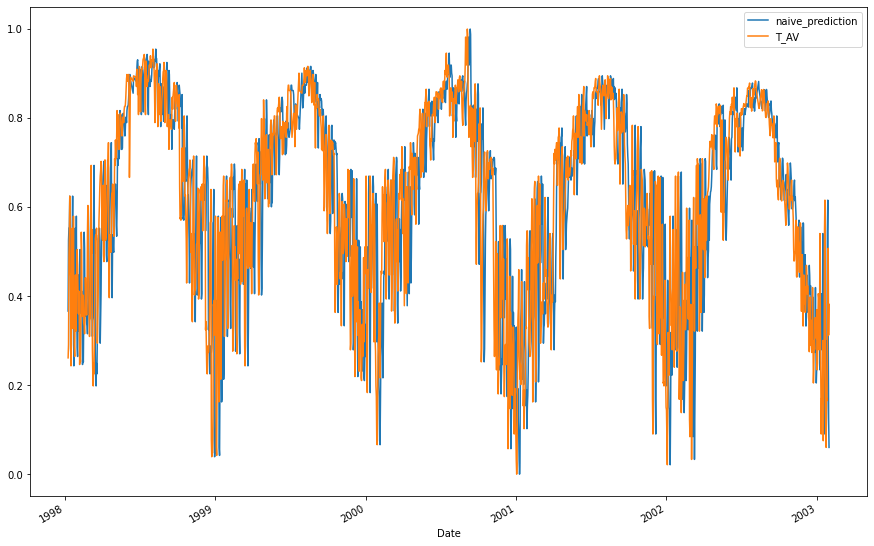

In [56]:
import datetime

def naive_forecasting(df, window):
  naive_prediction = df[["T_AV"]].shift(1, freq=datetime.timedelta(days=window))
  naive_prediction.columns = ["naive_prediction"]

  naive = df[["T_AV"]].merge(naive_prediction, 
                          how="outer", left_index=True, 
                          right_index=True)[['naive_prediction',"T_AV"]].iloc[window:-window,:]
  naive = naive.dropna()
  return naive

naive = naive_forecasting(train_df, 7)
naive.plot(figsize=(15,10))

In [57]:
from tensorflow.keras.metrics import MSE, MAPE

@tf.function
def r_2(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.divide(residual, total))
  return r2

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true),axis=0) * 100

def get_preds(naive):
  y_true = naive["T_AV"].values
  y_pred = naive["naive_prediction"].values
  return y_true, y_pred 

def evaluate(y_true, y_pred):
  print(f"MAPE {MAPE(y_true, y_pred)}")
  print(f"r squared {r_2(y_true, y_pred)}")
  print(f"MSE {MSE(y_true, y_pred)}")

In [58]:
train_naive = naive_forecasting(train_df, 7)
preds = get_preds(train_naive)
evaluate(*preds)

MAPE 167971.28125
r squared 0.5157150030136108
MSE 0.021786751225590706


In [59]:
val_naive = naive_forecasting(val_df, 7)
preds = get_preds(val_naive)
evaluate(*preds)

MAPE 502388.53125
r squared 0.49576884508132935
MSE 0.022547287866473198


# Training

In [60]:
!wandb login

wandb: Currently logged in as: sebastian-garcia-acosta (use `wandb login --relogin` to force relogin)


In [75]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten, Conv1D, Dense, Input, Dropout
from tensorflow.keras.metrics import MAPE, AUC
import tensorflow.keras.backend as K
from sklearn.metrics import roc_auc_score

def AUC_ROC(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

metrics = {
    "reg": [r_2, MAPE],
    "class": [AUC(name="auc"), f1],
}

# Initialize wandb with your project name
run = wandb.init(project='analytics-II-final-workshop',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.001,
                     "epochs": 1000,
                     "batch_size": BATCH_SIZE,
                     'patience': 20,
                     "losses": {
                         "reg":"mse",
                         "class": "binary_crossentropy",
                     },
                     'metrics': metrics,
                     'window_size': WINDOW_SIZE,
                     "architecture": "Conv1D",
                     "dataset-link": "https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection",
                     'dataset': 'Ozone Level Detection',
                     'group': 'jetson-nano',
                     'name': 'nano-fixed',
                 })

config = wandb.config

In [76]:
tf.keras.backend.clear_session()
tf.debugging.set_log_device_placement(True)

input = Input(shape= (WINDOW_SIZE, len(features)), name="input")
X = Conv1D(filters=64, kernel_size=5, activation='relu', name="conv1d_1")(input)
X = Conv1D(filters=32, kernel_size=3, activation='relu', name="conv1d_2")(X)
X = Flatten()(X)
X = Dropout(0.2)(X)
X = Dense(50, activation="relu", name="dense_1")(X)
output_reg = Dense(1, activation="linear", name="reg")(X)
output_class = Dense(1, activation="sigmoid", name="class")(X)

model = Model(inputs = [input], outputs={
    "reg": output_reg,
    "class": output_class
})

optimizer = tf.keras.optimizers.Adam(config.learning_rate)
model.compile(optimizer='adam', loss=config.losses, metrics=metrics)

x,y = next(iter(train_gen))
print(x.shape)
print(y["reg"].shape)
preds = model.predict(x)
preds["reg"].shape

(128, 30, 4)
(128,)


(128, 1)

In [77]:
plot_model(model, show_shapes=True, show_dtype=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Train

In [80]:
tf.keras.backend.set_floatx("float32")

n_samples_train = train_df.shape[0]
n_samples_val = val_df.shape[0]

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=config.patience,
                                                  restore_best_weights=True,
                                                  mode='min')

wand_callback = WandbCallback()

In [81]:
history = model.fit(
    train_gen, 
    epochs=1000, 
    validation_data = val_gen,
    steps_per_epoch= n_samples_train // BATCH_SIZE,
    validation_steps =  n_samples_val // BATCH_SIZE,
    verbose=1,
    callbacks=[early_stopping, wand_callback]
)

Epoch 1/1000
14/14 [==============================] - 30s 1s/step - loss: 0.7410 - class_loss: 0.6302 - reg_loss: 0.1107 - class_auc: 0.5094 - class_f1: 0.0674 - reg_r_2: -1.4199 - reg_mean_absolute_percentage_error: 299919.5075 - val_loss: 0.2394 - val_class_loss: 0.2175 - val_reg_loss: 0.0219 - val_class_auc: 0.3349 - val_class_f1: 0.0000e+00 - val_reg_r_2: 0.4554 - val_reg_mean_absolute_percentage_error: 24.5392
Epoch 2/1000
14/14 [==============================] - 16s 1s/step - loss: 0.3330 - class_loss: 0.3033 - reg_loss: 0.0297 - class_auc: 0.3204 - class_f1: 0.0000e+00 - reg_r_2: 0.2870 - reg_mean_absolute_percentage_error: 32.6267 - val_loss: 0.2549 - val_class_loss: 0.2363 - val_reg_loss: 0.0186 - val_class_auc: 0.2376 - val_class_f1: 0.0000e+00 - val_reg_r_2: 0.5375 - val_reg_mean_absolute_percentage_error: 23.4697
Epoch 3/1000
14/14 [==============================] - 16s 1s/step - loss: 0.3014 - class_loss: 0.2750 - reg_loss: 0.0263 - class_auc: 0.3605 - class_f1: 0.0000e+00

In [82]:
model.evaluate(val_gen, steps= (n_samples_val // BATCH_SIZE) )

5/5 [==============================] - 8s 618ms/step - loss: 0.1900 - class_loss: 0.1776 - reg_loss: 0.0124 - class_auc: 0.7122 - class_f1: 0.0000e+00 - reg_r_2: 0.6816 - reg_mean_absolute_percentage_error: 16.8260


[0.1899890899658203,
 0.17755194008350372,
 0.012437157332897186,
 0.7121848464012146,
 0.0,
 0.68163001537323,
 16.826040267944336]

In [83]:
inputs = [] 
ys = {
    "reg": [],
    "class": []
}

for x,y in val_generator():
  inputs.append(x)
  ys["reg"].append(y["reg"])
  ys["class"].append(y["class"])

ys["reg"] = np.array(ys["reg"]).flatten()
ys["class"] = np.array(ys["class"])

inputs = np.array(inputs)
preds = model.predict(inputs)

<AxesSubplot:>

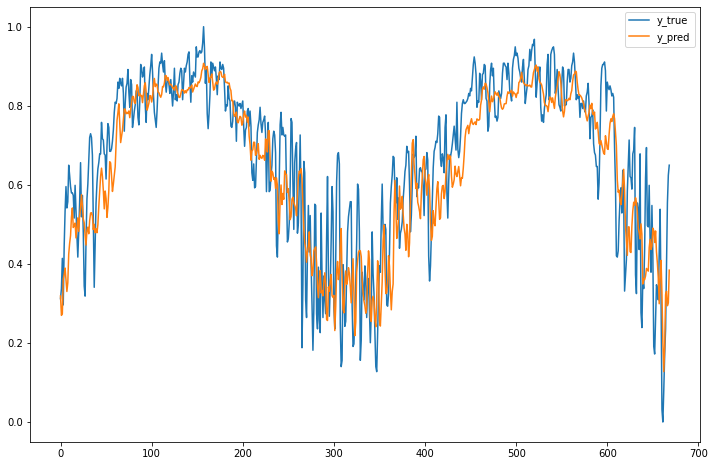

In [84]:
pd.DataFrame(data={"y_true": ys["reg"], "y_pred": preds["reg"].flatten()}).plot(figsize=(12,8))

In [85]:
evaluate(ys["reg"], preds["reg"].flatten())

MAPE 304366.46875
r squared 0.6937078237533569
MSE 0.013009213842451572


No handles with labels found to put in legend.


0.6966594827586207


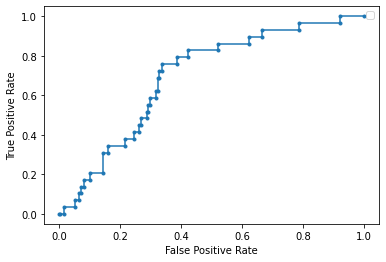

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

testy, probs = ys["class"], preds["class"].ravel()
fpr, tpr, _ = roc_curve(testy, probs)
auc_score = roc_auc_score(testy, probs)

print(auc_score)
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()